In [ ]:
#PROJETO TRADING PYTHON

In [7]:
#Bibliotecas
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


pd.options.mode.chained_assignment = None #Retirar alguns avisos


In [21]:
#Ativo escolhido
try:
    ativo = input("Digite um ativo")
    #Alterar buscando dentro o yahoo finance(código de negociação). Exemplo.: 'PETR4.SA'  
    dataInicio = input("Digite uma data de origem do ativo. Ex.:(2000-12-31) ---> Se não quiser adicionar data digite (nada)")
    dataFim = input("Digite uma data de origem do ativo. Ex.:(2023-12-31) ---> Se não quiser adicionar data digite (nada)")
    if(dataInicio == "nada"):
        dataInicio = ""
    if(dataFim == "nada"):
        dataFim = ""
    
except(RuntimeError):
    pass


'2023-12-31'

In [22]:
dados_ativo = yf.download(ativo, dataInicio, dataFim) #ativo(var),DataInicio,DataFim
dados_ativo

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-01,5.722500,5.722500,5.722500,5.722500,1.412932,0
2001-01-02,5.725000,5.971250,5.725000,5.912500,1.459845,32521600
2001-01-03,5.887500,6.212500,5.825000,6.212500,1.533918,60508800
2001-01-04,6.216250,6.268750,6.196250,6.237500,1.540091,46118400
2001-01-05,6.250000,6.387500,6.162500,6.250000,1.543177,41360000
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


<Axes: xlabel='Date'>

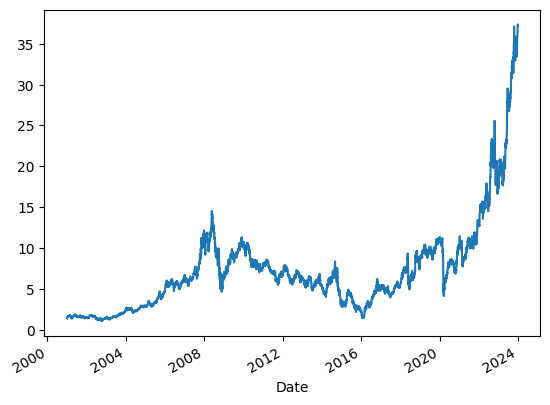

In [23]:
dados_ativo['Adj Close'].plot() #Capturar dados fechamento ajustado(adj Close)

In [ ]:
#Calcular Retornos
dados_ativo['retornos'] = dados_ativo['Adj Close'].pct_change().dropna() #Criar uma nova coluna que pega a coluna 'Adj Close' = retorno diário do Ativo
dados_ativo

In [ ]:
#TESTE
retorno = -1
filtrando_retorno = lambda x: x if x> 0 else 0 #lambda= retorna a ele mesmo, função auto-referente, x = valor de exemplo

filtrando_retorno(retorno)

In [ ]:
#Separar retornos Positivos e Negativos
dados_ativo['retornos_positivos'] = dados_ativo['retornos'].apply(lambda x: x if x > 0 else 0) #Aplicando a funcao lambda para valores positivos
dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x: abs(x) if x < 0 else 0) #abs(x) = pega o valor absoluto

dados_ativo

In [ ]:
#Calcular média dos retornos positivos e negativos nos últimos 22 dias
dados_ativo['media_retornos_positivos'] = dados_ativo['retornos_positivos'].rolling(window = 22).mean()#cria um coluna com uma janela de 22 dias e calcula a média
dados_ativo['media_retornos_negativos'] = dados_ativo['retornos_negativos'].rolling(window = 22).mean()

dados_ativo = dados_ativo.dropna() #Mostrar sem o NAN

dados_ativo

In [ ]:
#Calcular RSI
#Fórmula = 100 - 100(1 + mediaRetornosPositivos/mediaRetornosNegativos)

dados_ativo['RSI'] = (100 - 100/(1+ dados_ativo['media_retornos_positivos']/dados_ativo['media_retornos_negativos']))

dados_ativo.head(50) #Printa 50 dados

In [32]:
#Sinal de compra e venda (abaixo de 30 = sinal de compra)
dados_ativo.loc[dados_ativo['RSI'] < 30, 'compra'] = 'sim' #Verifica se o valor de RSI é maior ou menor que 30, sinalizando ou não a compra
dados_ativo.loc[dados_ativo['RSI'] > 30, 'compra'] = 'nao' #.loc = localizar um valor

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_positivos,retornos_negativos,media_retornos_positivos,media_retornos_negativos,RSI,compra
Date,,,,,,,,,,,,,
2001-01-30,6.800000,6.862500,6.748750,6.806250,1.680520,24995200,0.000919,0.000919,0.000000,0.010539,0.002502,80.815783,nao
2001-01-31,6.806250,6.923750,6.775000,6.813750,1.682371,34620800,0.001102,0.001102,0.000000,0.010589,0.002502,80.889163,nao
2001-02-01,6.812500,6.850000,6.675000,6.725000,1.660458,43728000,-0.013025,0.000000,0.013025,0.009080,0.003094,74.586174,nao
2001-02-02,6.662500,6.793750,6.662500,6.725000,1.660458,17532800,0.000000,0.000000,0.000000,0.006774,0.003094,68.646228,nao
2001-02-05,6.725000,6.750000,6.662500,6.700000,1.654285,21875200,-0.003717,0.000000,0.003717,0.006591,0.003263,66.887052,nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900,0.000275,0.000275,0.000000,0.006354,0.004496,58.559932,nao
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700,0.009618,0.009618,0.000000,0.006602,0.004496,59.487828,nao
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800,0.016059,0.016059,0.000000,0.007319,0.004496,61.946361,nao


In [ ]:
#Buscar datas de compra e de vendas
datas_compra = []
datas_venda = []

for i in range(len(dados_ativo)):
  print(i)

  if "sim" in dados_ativo['compra'].iloc[i]: #se o sim está dentro dessa coluna, e então ele pegará os dados de abertura do próximo dia
    datas_compra.append(dados_ativo.iloc[i+1].name) #.name = valor da coluna

datas_compra

In [ ]:
#Buscar datas de venda:
#     Se valor de RSI está acima de 40
#     10 dias de operação

data_compra = []
data_venda = []

for i in range(len(dados_ativo)):

    if "sim" in dados_ativo['compra'].iloc[i]:

        data_compra.append(dados_ativo.iloc[i+1].name) # +1 porque a gente compra no preço de abertura do dia seguinte.

        for j in range(1, 11):

            if dados_ativo['RSI'].iloc[i + j] > 40: #vendo se nos proximos 10 dias o RSI passa de 40

                data_venda.append(dados_ativo.iloc[i + j + 1].name) #vende no dia seguinte q bater 40
                break

            elif j == 10:
                data_venda.append(dados_ativo.iloc[i + j + 1].name)



data_venda

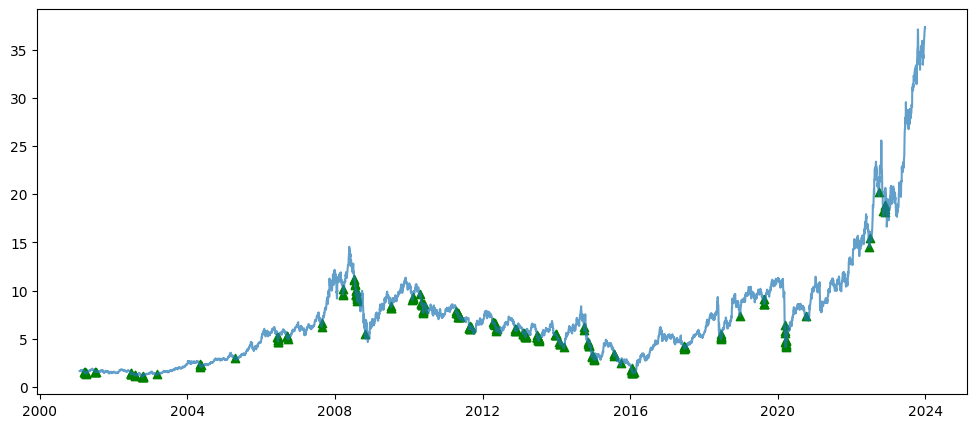

In [35]:
#Visualização de pontos de compra
plt.figure(figsize = (12, 5))
plt.scatter(dados_ativo.loc[data_compra].index, dados_ativo.loc[data_compra]['Adj Close'], marker = "^",c='g')
plt.plot(dados_ativo['Adj Close'], alpha = 0.7)

In [ ]:
lucros = dados_ativo.loc[data_venda]['Open'].values/dados_ativo.loc[data_compra]['Open'].values - 1

lucros

In [ ]:
operacoes_vencedoras = len(lucros[lucros > 0])/len(lucros)

operacoes_vencedoras #Neste caso 58% dos casos a gente ganha aplicando tal modelo

In [ ]:
media_ganhos = np.mean(lucros[lucros > 0])

media_ganhos * 100 #7.02% média de ganho

In [ ]:
media_perdas = abs(np.mean(lucros[lucros < 0]))

media_perdas * 100 #5.93% média de perda

In [ ]:
expectativa_matematica_modelo = (operacoes_vencedoras * media_ganhos) - ((1 - operacoes_vencedoras) * media_perdas)

expectativa_matematica_modelo * 100 #Para cada operacao, quanto você irá ganhar (em relação a média de ganhos e a média de perdas), nesse exemplo.: 1.48%

In [ ]:
performance_acumulada = (np.cumprod((1 + lucros)) - 1)

performance_acumulada * 100 #acumulando os lucros (rentabilidade acumulada)

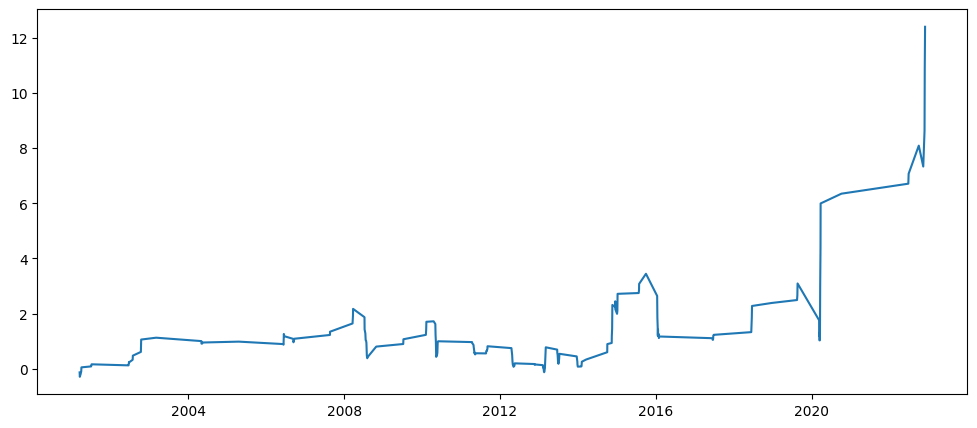

In [42]:
plt.figure(figsize = (12, 5))
plt.plot(data_compra, performance_acumulada) #Visualização do lucro acumulado 12.: 1200% de valorização

In [ ]:
retorno_buy_and_hold = dados_ativo['Adj Close'].iloc[-1]/dados_ativo['Adj Close'].iloc[0] - 1

retorno_buy_and_hold * 100 #Quanto rendeu desde da data de inicio